In [1]:
import pandas as pd
from molecules import Molecule
from tqdm.auto import tqdm
from typing import List

/Users/visanim/work/random-markov-field/fake_extract/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel("./apex_bio.xlsx", sheet_name="Chemical Data")

In [ ]:
molecules: List[Molecule] = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    mol = Molecule(
        apex_cas_number=row["CAS Number"],
        apex_item_name=row["Item Name"],
        apex_molecular_weight=row["M.w."],
        apex_molecular_formula=row["Formula"],
        apex_smiles=row["SMILES"],
        catalog_number=row["CatalogNumber"],
    )
    molecules.append(mol)

 17%|█▋        | 94/550 [00:29<02:22,  3.20it/s] [10:13:38] SMILES Parse Error: syntax error while parsing: O=C([C@]([H])(C)NC([C@](N)([H])CNC1=O)=O)N[C@@]([H])(CNC(CC(CCCN)N)=O)C(NC(C(N[C@@]1([H])[C@@H]2CCNC(N)=N2)=O)=CNC(N)=O)=O.[xH2SO4]
[10:13:38] SMILES Parse Error: check for mistakes around position 125:
[10:13:38] N2)=O)=CNC(N)=O)=O.[xH2SO4]
[10:13:38] ~~~~~~~~~~~~~~~~~~~~^
[10:13:38] SMILES Parse Error: Failed parsing SMILES 'O=C([C@]([H])(C)NC([C@](N)([H])CNC1=O)=O)N[C@@]([H])(CNC(CC(CCCN)N)=O)C(NC(C(N[C@@]1([H])[C@@H]2CCNC(N)=N2)=O)=CNC(N)=O)=O.[xH2SO4]' for input: 'O=C([C@]([H])(C)NC([C@](N)([H])CNC1=O)=O)N[C@@]([H])(CNC(CC(CCCN)N)=O)C(NC(C(N[C@@]1([H])[C@@H]2CCNC(N)=N2)=O)=CNC(N)=O)=O.[xH2SO4]'
 18%|█▊        | 99/550 [00:33<03:15,  2.31it/s][10:13:43] Explicit valence for atom # 17 P, 7, is greater than permitted
[10:13:43] Explicit valence for atom # 17 P, 7, is greater than permitted
[10:13:43] Explicit valence for atom # 17 P, 7, is greater than permitted
[10:13:43] Expl

Error fetching compound by SMILES.


 26%|██▌       | 142/550 [00:34<00:45,  9.02it/s][10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than permitted
[10:13:44] Explicit valence for atom # 19 P, 7, is greater than

In [4]:
failed_mols = [i for i in molecules if not i.has_compound()]

In [5]:
failed_mols

[Molecule(apex_cas_number='1264-72-8', failed_cas_number=True, apex_item_name='Colistin Sulfate', failed_item_name=True, apex_molecular_weight=1253.51, apex_molecular_formula='H2O4S.xUnspecified', apex_smiles=None, failed_smiles=True, apex_cleaned_smiles=None, rdkit_molecule=None, super_parent_mol=None, apex_valid_smiles=False, pubchem_compound=None)]

In [6]:
failed_smiles = [i for i in molecules if not i.apex_valid_smiles]

In [11]:
failed_smiles

[Molecule(apex_cas_number='1405-37-4', failed_cas_number=False, apex_item_name='Capreomycin Sulfate', failed_item_name=False, apex_molecular_weight=750.78, apex_molecular_formula='C25H44N14O7.H2SO4', apex_smiles='O=C([C@]([H])(C)NC([C@](N)([H])CNC1=O)=O)N[C@@]([H])(CNC(CC(CCCN)N)=O)C(NC(C(N[C@@]1([H])[C@@H]2CCNC(N)=N2)=O)=CNC(N)=O)=O.[xH2SO4]', failed_smiles=False, apex_cleaned_smiles='NCCCC(N)C(=O)NCC1NC(=O)C(CO)NC(=O)C(N)CNC(=O)C(C2CCN=C(N)N2)=NC(=O)C(CNC(N)=O)NC1=O', rdkit_molecule=<rdkit.Chem.rdchem.Mol object at 0x12bcb86d0>, super_parent_mol=<rdkit.Chem.rdchem.Mol object at 0x14e614190>, apex_valid_smiles=False, pubchem_compound=Compound(22836615)),
 Molecule(apex_cas_number='1264-72-8', failed_cas_number=True, apex_item_name='Colistin Sulfate', failed_item_name=True, apex_molecular_weight=1253.51, apex_molecular_formula='H2O4S.xUnspecified', apex_smiles=None, failed_smiles=True, apex_cleaned_smiles=None, rdkit_molecule=None, super_parent_mol=None, apex_valid_smiles=False, pubche

In [ ]:
many_compounds = [
    i for i in molecules if i.has_many_compounds() and i.apex_valid_smiles
]

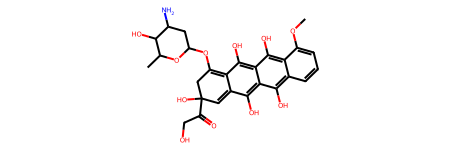

In [20]:
many_compounds[0].super_parent_mol

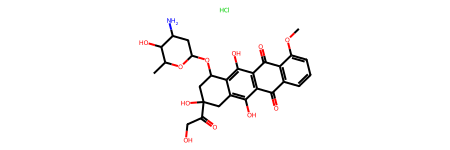

In [21]:
many_compounds[0].rdkit_molecule